In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set high-quality visualization style
sns.set_theme(style="whitegrid", palette="tab10")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the dataset
file_path = 'C:\\Users\\SC\\Desktop\\WINHMS Data Mining\\Data\\Company Wise LNL.xls'
# Define columns based on the report structure
cols = ['Empty', 'Company', 'Nights', 'Occupancy_Pct', 'Pax', 'Room_Revenue', 'Revenue_Pct', 'ARR', 'ARP']
df_lnl = pd.read_excel(file_path, skiprows=4, names=cols)

print("Libraries imported and data loaded.")

Libraries imported and data loaded.


In [2]:
# 1. Basic Cleaning: Remove empty columns and rows
df_lnl = df_lnl.drop(columns=['Empty']).dropna(subset=['Company'])

# 2. Filter out systemic rows like 'Total' or metadata
df_lnl = df_lnl[~df_lnl['Company'].str.contains('Total|Grand Total', case=False, na=False)]

# 3. Convert numeric columns for analysis
numeric_cols = ['Nights', 'Occupancy_Pct', 'Pax', 'Room_Revenue', 'Revenue_Pct', 'ARR', 'ARP']
for col in numeric_cols:
    df_lnl[col] = pd.to_numeric(df_lnl[col], errors='coerce').fillna(0)

# 4. Filter for active companies (Revenue > 0)
df_active = df_lnl[df_lnl['Room_Revenue'] > 0].copy()

print(f"Cleaned {len(df_active)} active companies/segments for analysis.")
df_active.head()

Cleaned 56 active companies/segments for analysis.


,Company,Nights,Occupancy_Pct,Pax,Room_Revenue,Revenue_Pct,ARR,ARP
1,ABBOTT HEALTHCARE PVT LTD,25.0,1.19,25.0,100000.00,0.73,4000.00,4000.00
2,ACCORD EQUIPS,15.0,0.72,21.0,88975.00,0.65,5931.67,4236.90
3,ADINATH HOLIDAYS,147.0,7.01,317.0,579200.00,4.22,3940.14,1827.13
4,AGODAYCS.COM,63.0,3.00,143.0,382111.87,2.79,6065.27,2672.11
5,AJIT VAIDYA,10.0,0.48,22.0,85400.00,0.62,8540.00,3881.82


C:\Users\SC\AppData\Local\Temp\ipykernel_11992\1430641829.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_rev_lnl, x='Room_Revenue', y='Company', palette='viridis')


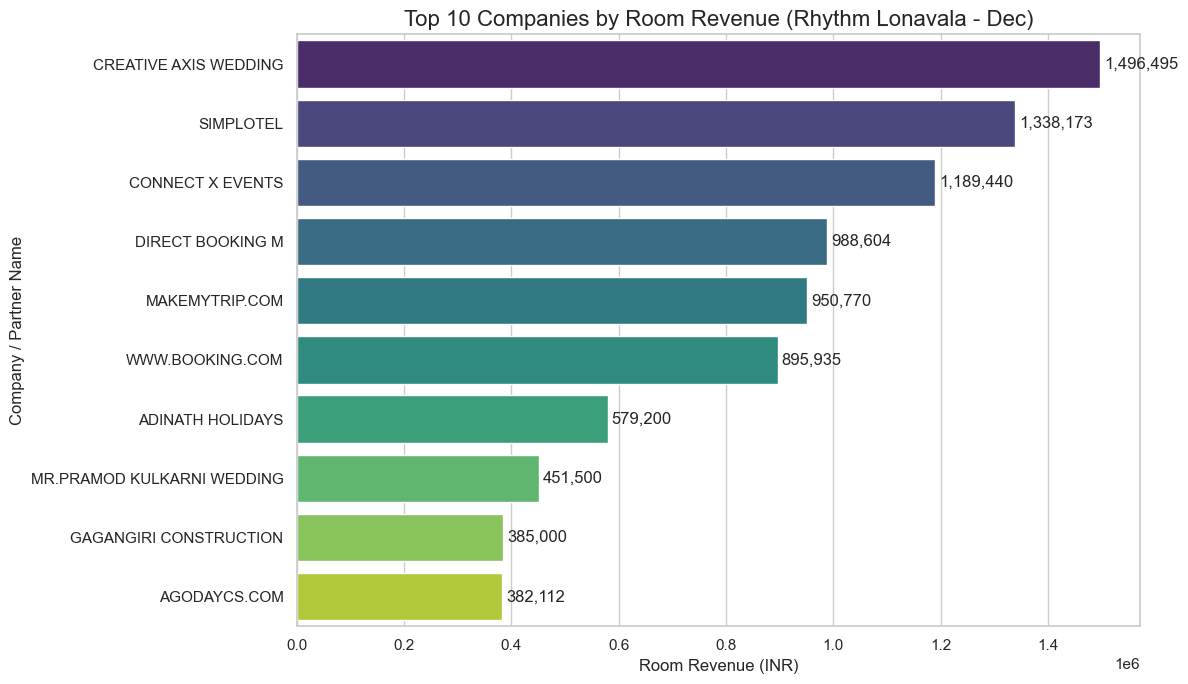

In [3]:
# Sort by Room Revenue to identify top partners
top_rev_lnl = df_active.sort_values(by='Room_Revenue', ascending=False).head(10)

plt.figure(figsize=(12, 7))
ax = sns.barplot(data=top_rev_lnl, x='Room_Revenue', y='Company', palette='viridis')
plt.title('Top 10 Companies by Room Revenue (Rhythm Lonavala - Dec)', fontsize=16)
plt.xlabel('Room Revenue (INR)', fontsize=12)
plt.ylabel('Company / Partner Name', fontsize=12)

# Adding value labels
for i in ax.containers:
    ax.bar_label(i, fmt='{:,.0f}', padding=3)

plt.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. DOMINANT PARTNERS: Identify your top-grossing partners (likely OTAs like Agoda or large Corporate accounts).
#### 2. REVENUE SKEW: The gap between the top 1-2 partners and the rest indicates how concentrated your revenue sources are.
#### 3. PARTNER RELIANCE: Heavy reliance on a single partner (e.g., a specific travel agency) suggests a need for diversifying the client base.

C:\Users\SC\AppData\Local\Temp\ipykernel_11992\3257272221.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_nights_lnl, x='Nights', y='Company', palette='magma')


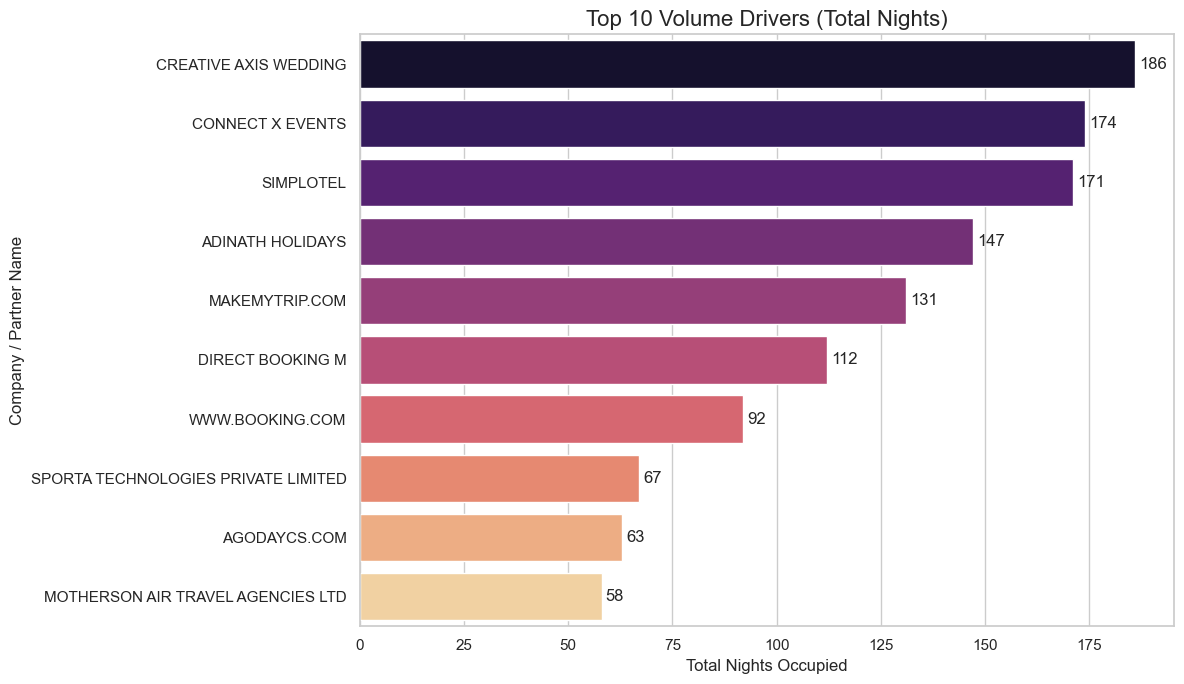

In [4]:
# Sort by Nights to see volume
top_nights_lnl = df_active.sort_values(by='Nights', ascending=False).head(10)

plt.figure(figsize=(12, 7))
ax = sns.barplot(data=top_nights_lnl, x='Nights', y='Company', palette='magma')
plt.title('Top 10 Volume Drivers (Total Nights)', fontsize=16)
plt.xlabel('Total Nights Occupied', fontsize=12)
plt.ylabel('Company / Partner Name', fontsize=12)

for i in ax.containers:
    ax.bar_label(i, padding=3)

plt.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. BASE OCCUPANCY: Partners like 'ADINATH HOLIDAYS' or 'AGODA' often act as the base occupancy drivers.
#### 2. VOLUME vs VALUE: Compare this chart with the Revenue chart. If a partner is high on nights but low on revenue, they are a "High Volume, Low Yield" partner.
#### 3. OPERATION IMPACT: High-night partners place more demand on resort amenities (pool, dining, housekeeping).

C:\Users\SC\AppData\Local\Temp\ipykernel_11992\1905869769.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_arr_lnl, x='ARR', y='Company', palette='coolwarm')


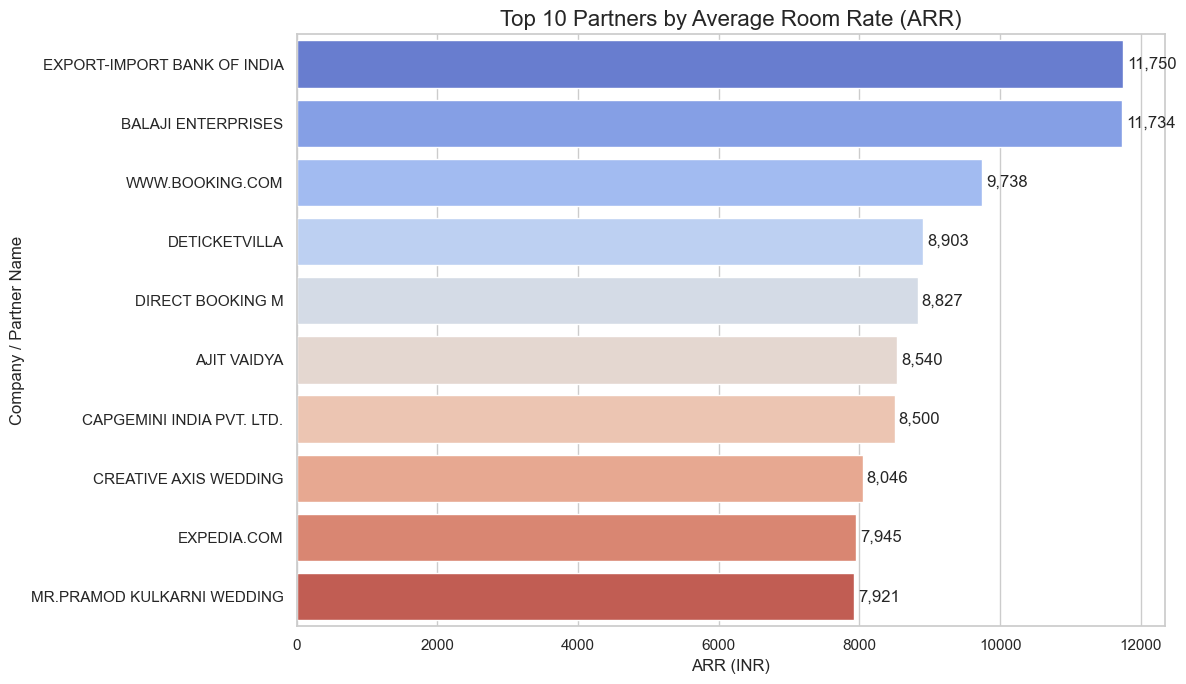

In [5]:
# Sort by ARR to find high-yield partners
top_arr_lnl = df_active.sort_values(by='ARR', ascending=False).head(10)

plt.figure(figsize=(12, 7))
ax = sns.barplot(data=top_arr_lnl, x='ARR', y='Company', palette='coolwarm')
plt.title('Top 10 Partners by Average Room Rate (ARR)', fontsize=16)
plt.xlabel('ARR (INR)', fontsize=12)
plt.ylabel('Company / Partner Name', fontsize=12)

for i in ax.containers:
    ax.bar_label(i, fmt='{:,.0f}', padding=3)

plt.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. PREMIUM SEGMENTS: Partners at the top of this list are booking your most expensive rooms or peak dates.
#### 2. RATE INTEGRITY: If individual bookings or specific niche agents have very high ARRs, they represent your most profitable segments.
#### 3. YIELD POTENTIAL: Targeting more business from these high-ARR partners can increase overall profitability without increasing occupancy stress.

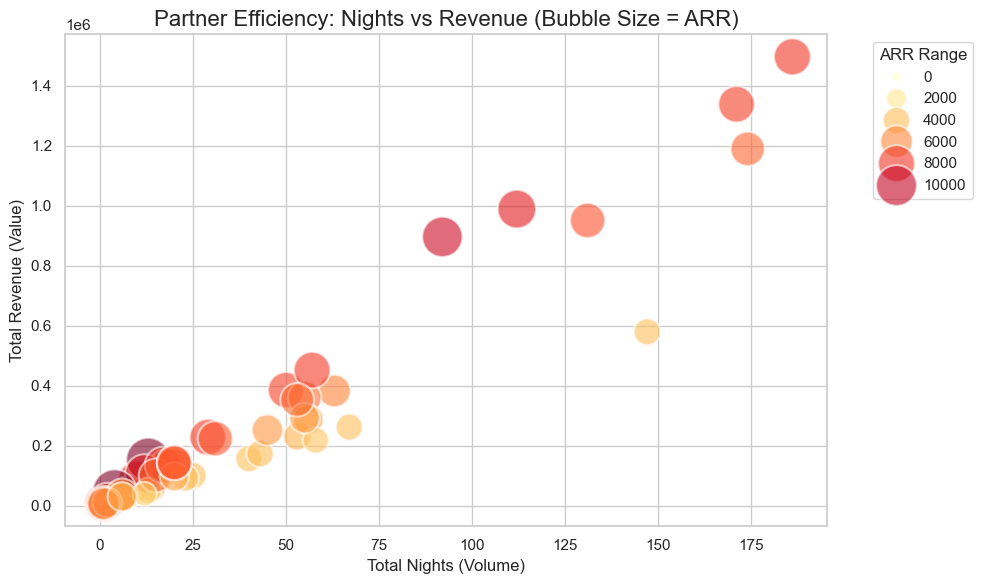

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_active, x='Nights', y='Room_Revenue', size='ARR', 
                hue='ARR', sizes=(50, 1000), alpha=0.6, palette='YlOrRd')

plt.title('Partner Efficiency: Nights vs Revenue (Bubble Size = ARR)', fontsize=16)
plt.xlabel('Total Nights (Volume)', fontsize=12)
plt.ylabel('Total Revenue (Value)', fontsize=12)
plt.legend(title='ARR Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. THE GOLDEN QUADRANT: Partners in the top-right are your best partners (High Volume + High Revenue).
#### 2. HIGH YIELD OUTLIERS: Partners high on the Y-axis but low on the X-axis (Large bubble size) are extremely efficient, generating high revenue from very few nights.

In [7]:
# Create a summary of key metrics
summary = df_active[['Company', 'Nights', 'Room_Revenue', 'ARR', 'Revenue_Pct']].sort_values(by='Room_Revenue', ascending=False)
summary.to_csv('LNL_Company_Analysis_Summary.csv', index=False)

print("Analysis Complete. Top 5 Revenue Contributing Partners:")
summary.head(5)

Analysis Complete. Top 5 Revenue Contributing Partners:


,Company,Nights,Room_Revenue,ARR,Revenue_Pct
16,CREATIVE AXIS WEDDING,186.0,1496495.00,8045.67,10.91
69,SIMPLOTEL,171.0,1338172.80,7825.57,9.75
15,CONNECT X EVENTS,174.0,1189440.00,6835.86,8.67
20,DIRECT BOOKING M,112.0,988604.45,8826.83,7.21
44,MAKEMYTRIP.COM,131.0,950769.80,7257.78,6.93


#### Summary of Insights for Rhythm Lonavala:
#### 1. Volume Anchors: Partners like ADINATH HOLIDAYS (147 nights) provide significant occupancy, helping to keep the resort busy.

#### 2. Yield Leaders: Smaller, perhaps more exclusive bookings (like AJIT VAIDYA) show a much higher ARR (~8,540 INR), indicating a premium guest profile compared to mass-market agents.

#### 3. OTA Performance: AGODAYCS.COM is a significant driver, contributing both volume and a respectable ARR, though likely carrying higher commission costs than direct agents.

#### 4. Portfolio Balance: The data shows a healthy mix of corporate clients (like ABBOTT) and travel partners, which helps balance mid-week corporate demand with weekend leisure demand.